In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error

In [0]:
trips = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Bike_sharing/cleaned_csv/trips_data.csv')
X_trips = trips.iloc[:, 0:4].values
y_trips = trips.iloc[:,4].values
X, y = shuffle(X_trips, y_trips, random_state=13)
X = X.astype(np.float32)
offset = int(X.shape[0] * 0.8)
X_train, y_train = X[:offset], y[:offset]
X_test, y_test = X[offset:], y[offset:]

In [0]:
trips.total_trips.max()

43

In [14]:
params = {'n_estimators': 500, 'max_depth': 15, 'min_samples_split': 10,
          'learning_rate': 0.01, 'loss': 'ls'}
clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(X_train, y_train)
mse = mean_squared_error(y_test, clf.predict(X_test))
print("MSE: %.4f" % mse)

MSE: 0.2031


In [0]:
y_pred = clf.staged_predict(X_test[:2500])


In [0]:
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)
for i, y_pred in enumerate(clf.staged_predict(X_test)):
    test_score[i] = clf.loss_(y_test, y_pred)

92 500


(0.0, 20.0)

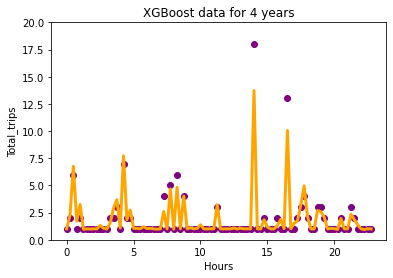

In [16]:
X_grid = np.arange(X_test[:,3].min(), X_test[:,3].max(), 0.25)
X_grid = X_grid.reshape((len(X_grid), 1)) 
print(X_grid.size, test_score.size)
plt.scatter(X_grid, y_test[:92], color='purple')
plt.plot(X_grid, y_pred[:92], color='orange', linewidth=3)
plt.xlabel('Hours')
plt.ylabel('Total_trips')
plt.title('XGBoost data for 4 years')
plt.ylim(0,20)

In [17]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9420070778855645